In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Data-Analysis-Projects/Credit_Card_Fraud_Detection')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Data-Analysis-Projects/Credit_Card_Fraud_Detection


## Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
classification_report, confusion_matrix, precision_recall_curve, \
average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Custom Functions
import curves as C

In [0]:
dataset = pd.read_csv('creditcard.csv')
dataset_X = dataset.drop(['Class'], axis = 1)
dataset_y = dataset['Class']

## Splitting the dataset into the Training set and Test set

In [0]:
def split_data(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
    print('train-set size: ', len(y_train), 
          '\ntest-set size: ', len(y_test))    
    print('fraud cases in train-set', sum(y_train),
          '\nfraud cases in test-set: ', sum(y_test))
    return X_train, X_test, y_train, y_test

## Define function to get predictions

In [0]:
def get_predictions(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    sns.heatmap(cm, cmap = "coolwarm", annot = True, linewidths = 0.5)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted class")
    plt.ylabel("Real class")
    plt.show()
    
    print('==============================')
    print(cm)
    print('==============================')
    print('accuracy = {}'.format(accuracy))
    print('precision = {}'.format(precision))
    print('recall = {}'.format(recall))
    print('f1 score = {}'.format(f1))
    print('==============================')
    print(classification_report(y_true, y_pred))

## Feature importance plot

In [0]:
def plot_feature_importance(model, predictors):
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by = 'Feature importance', ascending = False)
    plt.figure(figsize = (15, 8))
    plt.title('Features importance', fontsize = 14)
    s = sns.barplot(x = 'Feature', y = 'Feature importance', data = tmp)
    s.set_xticklabels(s.get_xticklabels(), rotation = 45)
    plt.show()

## Case 1: Drop 'Time', 'Amount'

In [9]:
drop_list = ['Time', 'Amount']
# drop_list = ['Time', 'Amount', 'V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8']
X = dataset_X.drop(drop_list, axis = 1)
predictor_name = X.columns
X = X.values
y = dataset_y.values
print(predictor_name)
X_train, X_test, y_train, y_test = split_data(X, y)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in train-set 384 
fraud cases in test-set:  108


 ## 1. Logistic Regression

### 1.1 Logistic Regression - Without hyperparameters tuning

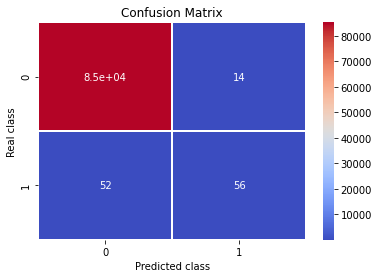

[[85321    14]
 [   52    56]]
accuracy = 0.9992275552122467
precision = 0.8
recall = 0.5185185185185185
f1 score = 0.6292134831460674
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.80      0.52      0.63       108

    accuracy                           1.00     85443
   macro avg       0.90      0.76      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [10]:
lr_clf = LogisticRegression(solver = 'liblinear', random_state = 0)
lr_clf.fit(X_train, y_train)
y_score = lr_clf.predict_proba(X_test)[:, 1]
y_pred = lr_clf.predict(X_test)
get_predictions(y_true = y_test, y_pred = y_pred)

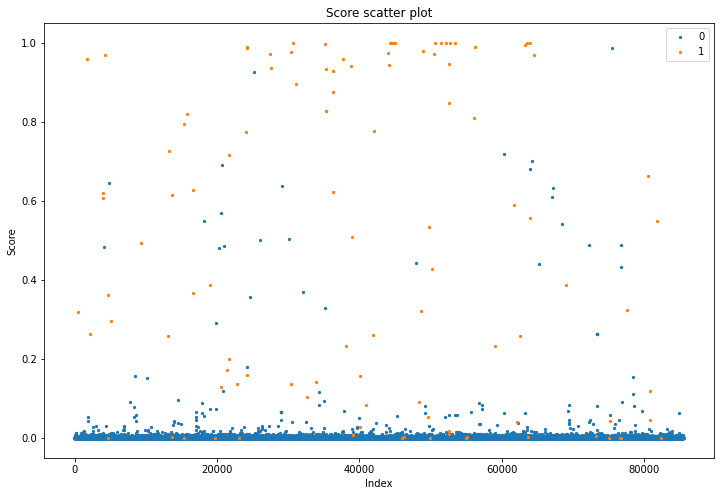

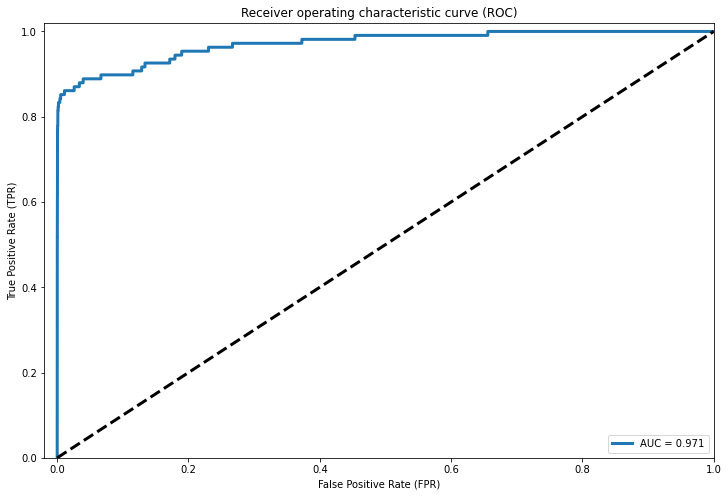

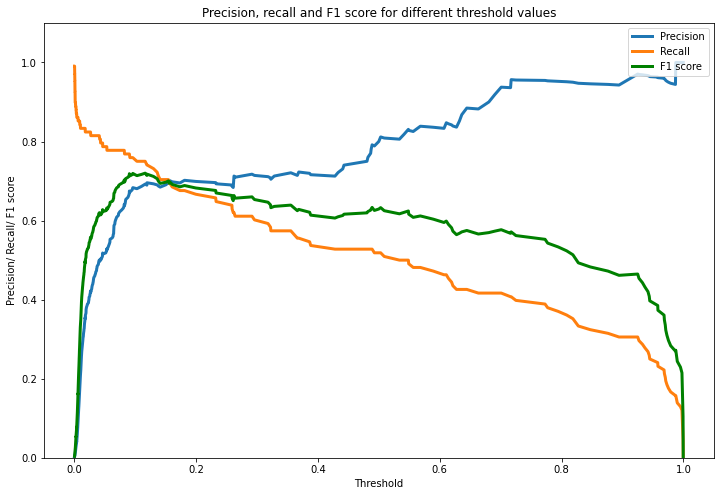

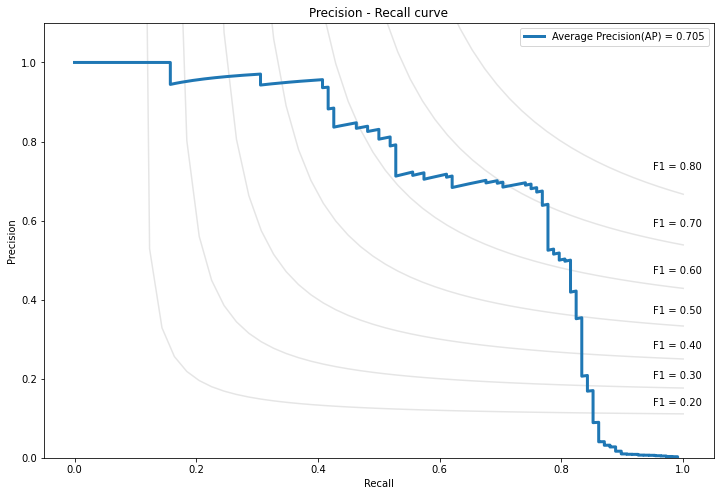

In [11]:
# ## Plot scores, ROC, Precision, Recall, F1 curve, Precision-Recall curve
C.plot_scores(y_true = y_test, y_score = y_score)
fpr_lr, tpr_lr, roc_auc_lr = C.plot_ROC(y_true = y_test, y_score = y_score)
precision_lr, recall_lr, threshold_lr, f1_scores_lr = C.plot_precision_recall_vs_threshold(y_true = y_test, y_score = y_score)
_, _, pr_auc_lr = C.plot_precision_recall(y_true = y_test, y_score = y_score)

### 1.2 Grid/Randmized Search CV to optimize 'F1'

#### Applying ***Grid Search*** to find the best model and the best parameters

In [12]:
classifier = LogisticRegression(solver = 'liblinear', random_state = 0)
parameter = {'penalty': ['l1', 'l2'], 
             'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10]}           

skf = StratifiedKFold(n_splits = 5, random_state = 0)
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameter,
                           scoring = 'f1',
                           cv = skf.split(X_train, y_train),
                           n_jobs = -1)
tStart = time.time()
grid_search = grid_search.fit(X_train, y_train)
tEnd = time.time()

best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print('It costs {:.2f} sec.'.format(tEnd - tStart))
print(best_parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


It costs 230.07 sec.
{'C': 0.2, 'penalty': 'l2'}


#### Applying ***Randomized Search***  to find the best model and the best parameters

In [13]:
'''
from scipy.stats import uniform
from sklearn.utils.fixes import loguniform

classifier = LogisticRegression(solver = 'liblinear', random_state = 0)
parameter = {'penalty': ['l1', 'l2'], 
             'C': uniform(1e-3, 1e2)}
skf = StratifiedKFold(n_splits = 5, random_state = 0)
rand_search = RandomizedSearchCV(estimator = classifier, 
                                 param_distributions = parameter,
                                 n_iter = 1000, 
                                 scoring = 'f1',                                  
                                 cv = skf.split(X_train, y_train),
                                 n_jobs = -1)
tStart = time.time()
rand_search = rand_search.fit(X_train, y_train)
tEnd = time.time()

rand_best_score = rand_search.best_score_
rand_best_parameters = rand_search.best_params_
rand_results = rand_search.cv_results_
print('It costs {:.2f} sec.'.format(tEnd - tStart))
print(rand_best_parameters)
'''

"\nfrom scipy.stats import uniform\nfrom sklearn.utils.fixes import loguniform\n\nclassifier = LogisticRegression(solver = 'liblinear', random_state = 0)\nparameter = {'penalty': ['l1', 'l2'], \n             'C': uniform(1e-3, 1e2)}\nskf = StratifiedKFold(n_splits = 5, random_state = 0)\nrand_search = RandomizedSearchCV(estimator = classifier, \n                                 param_distributions = parameter,\n                                 n_iter = 1000, \n                                 scoring = 'f1',                                  \n                                 cv = skf.split(X_train, y_train),\n                                 n_jobs = -1)\ntStart = time.time()\nrand_search = rand_search.fit(X_train, y_train)\ntEnd = time.time()\n\nrand_best_score = rand_search.best_score_\nrand_best_parameters = rand_search.best_params_\nrand_results = rand_search.cv_results_\nprint('It costs {:.2f} sec.'.format(tEnd - tStart))\nprint(rand_best_parameters)\n"

### 1.3 Logistic Regression with best parameters

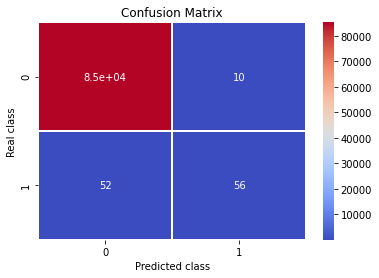

[[85325    10]
 [   52    56]]
accuracy = 0.9992743700478681
precision = 0.8484848484848485
recall = 0.5185185185185185
f1 score = 0.6436781609195402
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.85      0.52      0.64       108

    accuracy                           1.00     85443
   macro avg       0.92      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [14]:
lr_clf = LogisticRegression(**best_parameters, solver = 'liblinear', random_state = 0)
lr_clf.fit(X_train, y_train)
y_score = lr_clf.predict_proba(X_test)[:, 1]
y_pred = lr_clf.predict(X_test)
get_predictions(y_true = y_test, y_pred = y_pred)

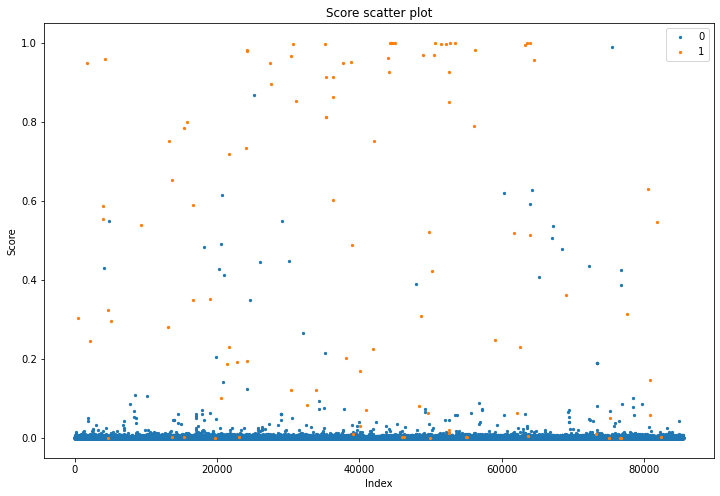

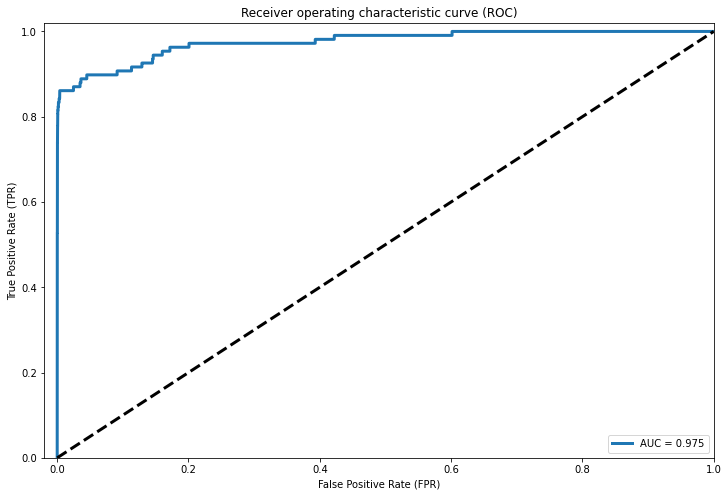

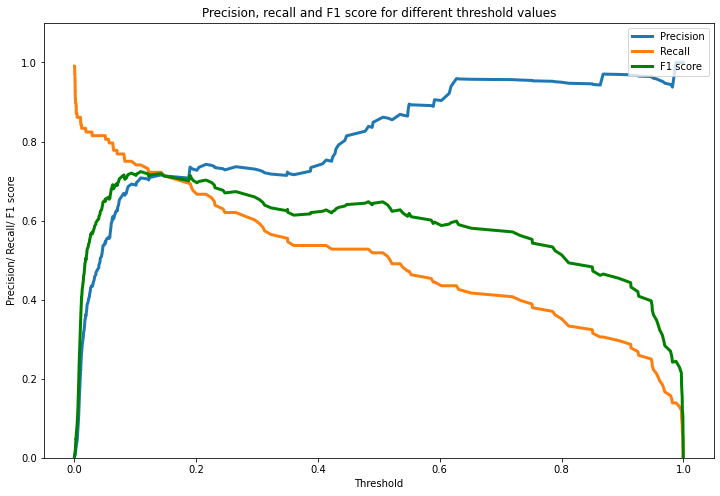

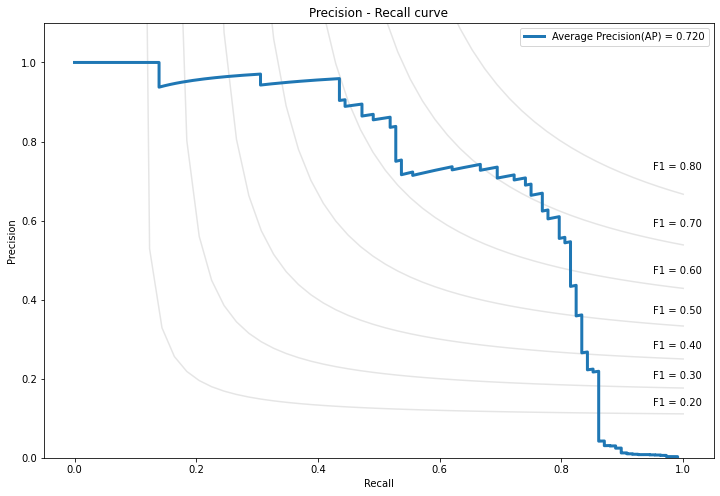

In [15]:
# Plot scores, ROC, Precision, Recall, F1 curve, Precision-Recall curve
C.plot_scores(y_true = y_test, y_score = y_score)
fpr_lr, tpr_lr, roc_auc_lr = C.plot_ROC(y_true = y_test, y_score = y_score)
precision_lr, recall_lr, threshold_lr, f1_scores_lr = C.plot_precision_recall_vs_threshold(y_true = y_test, y_score = y_score)
_, _, pr_auc_lr = C.plot_precision_recall(y_true = y_test, y_score = y_score)

In [0]:
from selectThreshold import selectThresholdByCV
skf = StratifiedKFold(n_splits = 5)
thresholds = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
classifier = LogisticRegression(**best_parameters, solver = 'liblinear', random_state = 0)

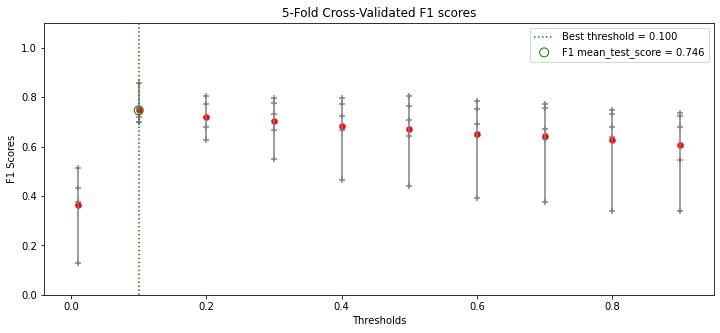

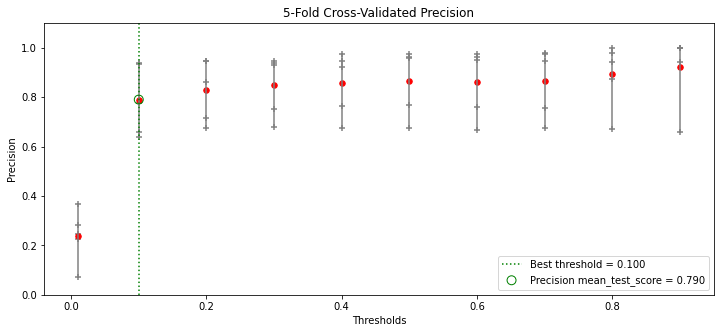

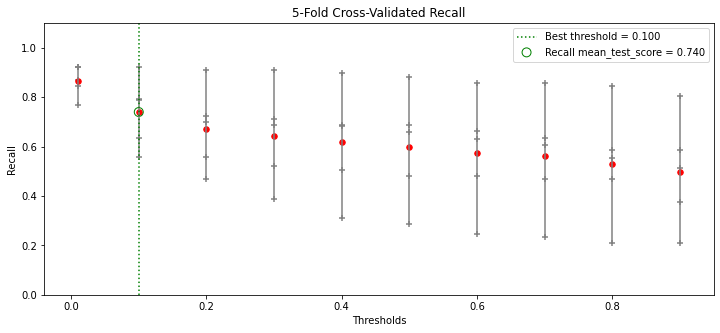

{'F1': array([0.74644479]),
 'Precision': array([0.79000044]),
 'Recall': array([0.73971292]),
 'Threshold': array([0.1])}

In [22]:
best_threshold, results = selectThresholdByCV(clf = classifier, X = X_train, y = y_train, 
                                              thresholds = thresholds, cv = skf, 
                                              plot_result = True)
best_threshold

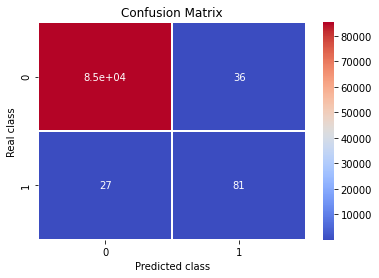

[[85299    36]
 [   27    81]]
accuracy = 0.9992626663389628
precision = 0.6923076923076923
recall = 0.75
f1 score = 0.7199999999999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.69      0.75      0.72       108

    accuracy                           1.00     85443
   macro avg       0.85      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
lr_clf = LogisticRegression(**best_parameters, solver = 'liblinear', random_state = 0)
lr_clf.fit(X_train, y_train)
y_score = lr_clf.predict_proba(X_test)[:, 1]
y_pred = y_score > 0.1
get_predictions(y_true = y_test, y_pred = y_pred)